In [1]:
import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [4]:
train_generator = train_datagen.flow_from_directory('dataset/training_set',target_size=(64, 64),batch_size=32,class_mode='binary')

Found 8005 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
validation_generator = test_datagen.flow_from_directory('dataset/test_set',target_size=(64,64),batch_size=32,class_mode='binary')

Found 2023 images belonging to 2 classes.


In [7]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [17]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history = cnn.fit(x=train_generator,validation_data=validation_generator,epochs=5)

Epoch 1/5
251/251 [==============================] - 54s 216ms/step - loss: 0.4725 - accuracy: 0.7726 - val_loss: 0.5453 - val_accuracy: 0.7439
Epoch 2/5
251/251 [==============================] - 48s 191ms/step - loss: 0.4534 - accuracy: 0.7873 - val_loss: 0.5019 - val_accuracy: 0.7563
Epoch 3/5
251/251 [==============================] - 51s 204ms/step - loss: 0.4409 - accuracy: 0.7951 - val_loss: 0.4518 - val_accuracy: 0.7939
Epoch 4/5
251/251 [==============================] - 54s 216ms/step - loss: 0.4251 - accuracy: 0.8000 - val_loss: 0.4483 - val_accuracy: 0.8008
Epoch 5/5
251/251 [==============================] - 52s 207ms/step - loss: 0.4172 - accuracy: 0.8066 - val_loss: 0.4604 - val_accuracy: 0.7810


In [30]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("dataset/single_prediction/predict1.jpg",target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [31]:
prediction

'cat'

In [33]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


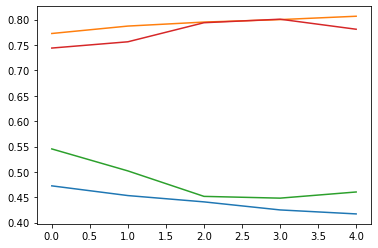

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])